<a href="https://colab.research.google.com/github/nisasafitri/Latihan-Python/blob/main/Home_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading The Data**

In [1]:
import pandas as pd
import numpy as np


In [4]:
from google.colab import files
uploaded = files.upload()

Saving home_loan.csv to home_loan.csv


In [5]:
df = pd.read_csv('home_loan.csv')

In [6]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


**Data Preprocessing And Data Cleaning**

In [8]:
df.shape

(367, 12)

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 12)


In [11]:
print(df.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [12]:
df = df.dropna()

In [25]:
df.count()

Gender                289
Married               289
Dependents            289
Education             289
Self Employed         289
Applicant Income      289
Coapplicant Income    289
Loan Amount           289
Loan Amount Term      289
Credit History        289
Property Area         289
dtype: int64

In [26]:
df.rename(columns = {"Self_Employed": "Self Employed", "LoanAmount": "Loan Amount", "Loan_Amount_Term": "Loan Amount Term", "Credit_History": "Credit History", "Property_Area": "Property Area", "ApplicantIncome": "Applicant Income", "CoapplicantIncome": "Coapplicant Income"}, inplace=True)

In [28]:
df.head(5)

,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


**Data Visualization**

In [29]:
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

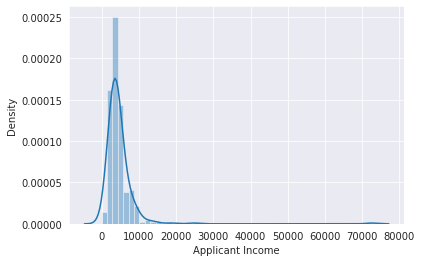

In [31]:
sns.distplot(df['Applicant Income'])

Analisis : Dapat dilihat bahwa pendapatan pelamar yang terbanyak yaitu di bawah 10000 sedangkan pendapatan 10000+ semakin sedikit terutama 20000+ sampai 80000+ sangat sedikit

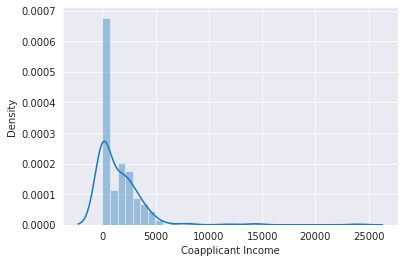

In [32]:
sns.distplot(df['Coapplicant Income'])

Analisis : Pendapatan coapplicant income lebih rendah dari applicant income. Pendapatan paling banyak yaitu 0. Rentang pendapatan hanya sampai maksimal 25000. Pendapatan 5000+ sampai 25000+ sangat sedikit

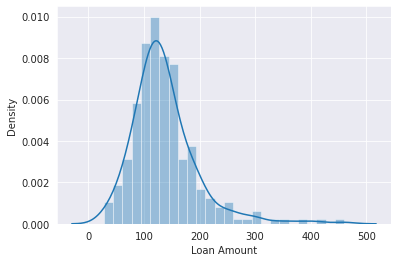

In [33]:
sns.distplot(df['Loan Amount'])

Analisis : Jumlah pinjaman terbanyak yaitu 100+. Dari 0+ sampai 100 mengalami kenaikan jumlah. Sedangkan dari 100+ sampai 300+ mengalami penurunan. Pinjaman dengan nominal 300+ sampai 500+ hanya sedikit

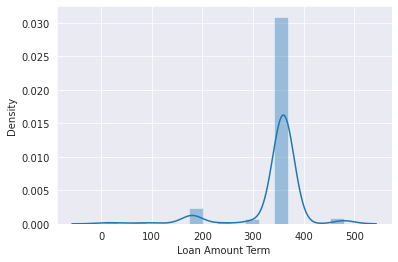

In [34]:
sns.distplot(df['Loan Amount Term'])

Analisis : Lama hari pinjaman terbanyak yaitu 300+. Pinjaman terlama yaitu 500+ dengan jumlah peminjam sangat sedikit

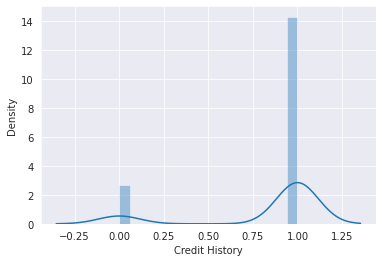

In [35]:
sns.distplot(df['Credit History'])

Analisis : Credit history terbanyak yaitu 1.0

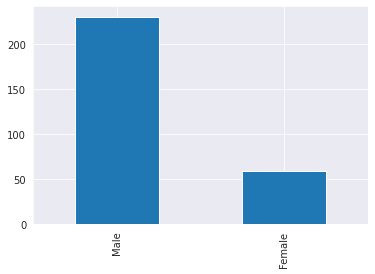

In [36]:
#Gender Analysis
df['Gender'].value_counts().plot(kind='bar')

In [37]:
df['Gender'].value_counts()

Male      230
Female     59
Name: Gender, dtype: int64

Analisis : Peminjam laki-laki lebih banyak dari peminjam perempuan. Sebagai asumsi kemungkinan perempuan (istri) banyak yang menjadi coapplicant namun masih perlu pembuktian

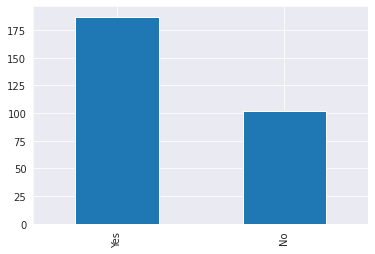

In [40]:
#Married Analysis
df['Married'].value_counts().plot(kind='bar')

In [41]:
df['Married'].value_counts()

Yes    187
No     102
Name: Married, dtype: int64

Analisis : Jumlah peminjam yang sudah menikah lebih banyak dari yang belum menikah.

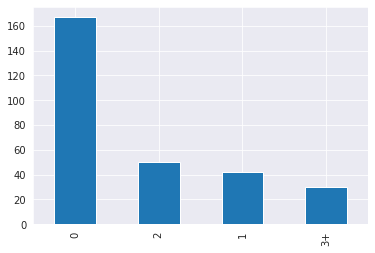

In [38]:
#Dependents Analysis
df['Dependents'].value_counts().plot(kind='bar')

In [39]:
df['Dependents'].value_counts()

0     167
2      50
1      42
3+     30
Name: Dependents, dtype: int64

Analisis : Jumlah peminjam terbanyak memiliki tanggungan 0. Kemungkinan memiliki korelasi antara jumlah tanggungan 0 dengan peminjam yang belum menikah namun masih perlu pembuktian lebih lanjut.

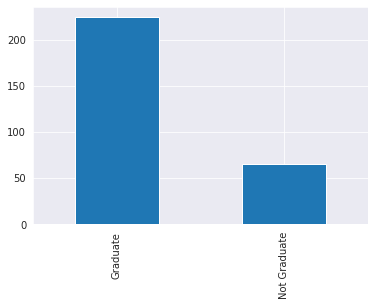

In [42]:
#Education Analysis
df['Education'].value_counts().plot(kind='bar')

In [43]:
df['Education'].value_counts()

Graduate        224
Not Graduate     65
Name: Education, dtype: int64

Analisis : Peminjam yang sudah lulus lebih banyak dari yang belum lulus. Kemungkinan jumlah yang sudah menikah berkorelasi dengan jumlah yang sudah lulus namun perlu pembuktian lebih lanjut.

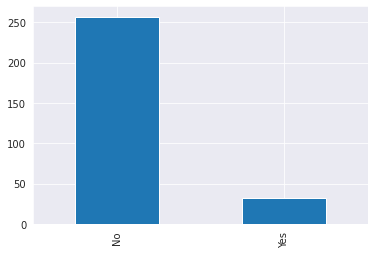

In [44]:
#Self Employed Analysis
df['Self Employed'].value_counts().plot(kind='bar')

In [45]:
df['Self Employed'].value_counts()

No     257
Yes     32
Name: Self Employed, dtype: int64

Analisis : Peminjam yang bukan self employed lebih banyak dari self employed

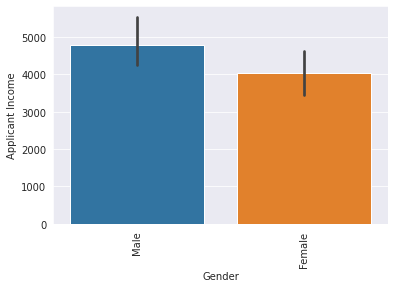

In [52]:
#Average applicant income of each gender
sns.barplot(x=df['Gender'],y=df['Applicant Income'])
plt.xticks(rotation='vertical')
plt.show()

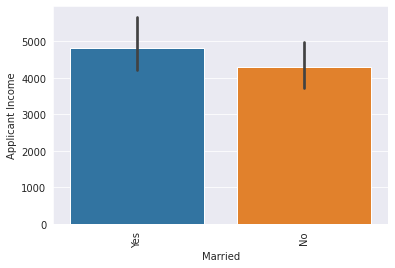

In [53]:
#Average applicant income of each status (married)
sns.barplot(x=df['Married'],y=df['Applicant Income'])
plt.xticks(rotation='vertical')
plt.show()

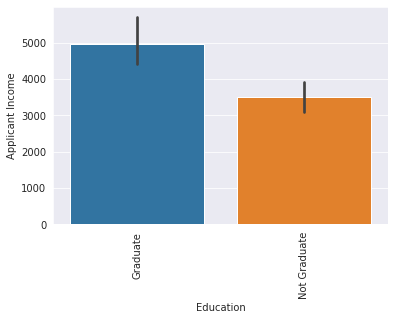

In [54]:
#Average applicant income of each education
sns.barplot(x=df['Education'],y=df['Applicant Income'])
plt.xticks(rotation='vertical')
plt.show()

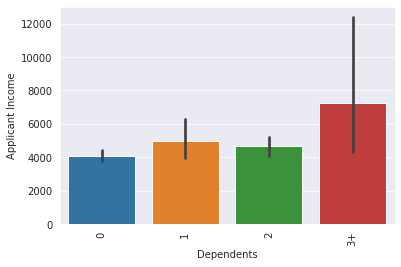

In [55]:
#Average applicant income of each dependents
sns.barplot(x=df['Dependents'],y=df['Applicant Income'])
plt.xticks(rotation='vertical')
plt.show()

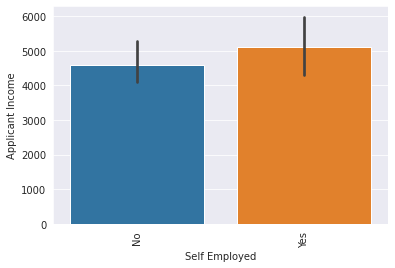

In [56]:
#Average applicant income of each self employed
sns.barplot(x=df['Self Employed'],y=df['Applicant Income'])
plt.xticks(rotation='vertical')
plt.show()

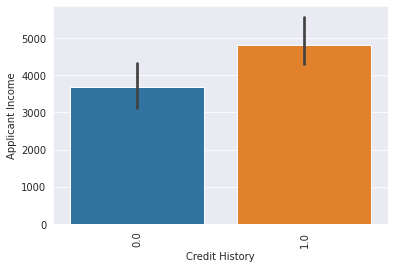

In [57]:
#Average applicant income of each credit history
sns.barplot(x=df['Credit History'],y=df['Applicant Income'])
plt.xticks(rotation='vertical')
plt.show()

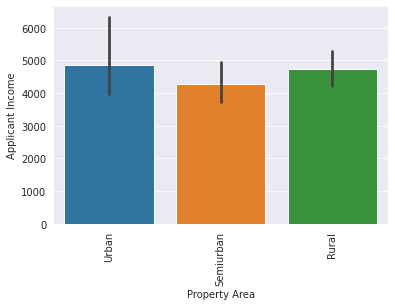

In [59]:
#Average applicant income of each property area
sns.barplot(x=df['Property Area'],y=df['Applicant Income'])
plt.xticks(rotation='vertical')
plt.show()

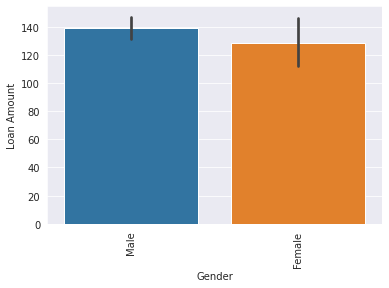

In [61]:
#Average loan amount of each gender
sns.barplot(x=df['Gender'],y=df['Loan Amount'])
plt.xticks(rotation='vertical')
plt.show()

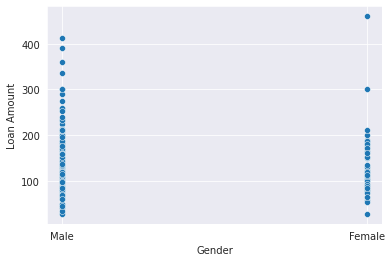

In [90]:
sns.scatterplot(x=df['Gender'], y=df['Loan Amount'])

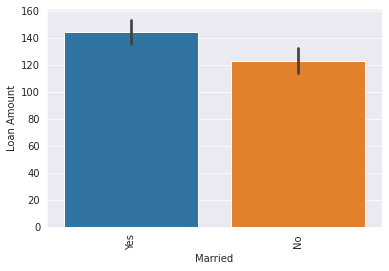

In [62]:
#Average loan amount of each status (married)
sns.barplot(x=df['Married'],y=df['Loan Amount'])
plt.xticks(rotation='vertical')
plt.show()

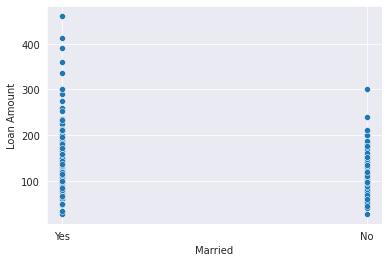

In [91]:
sns.scatterplot(x=df['Married'], y=df['Loan Amount'])

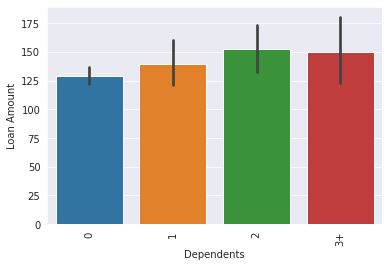

In [63]:
#Average loan amount of each dependents
sns.barplot(x=df['Dependents'],y=df['Loan Amount'])
plt.xticks(rotation='vertical')
plt.show()

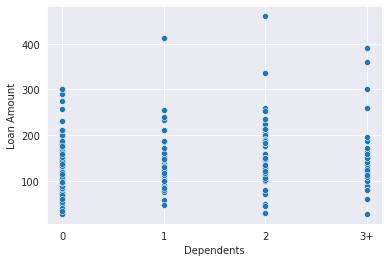

In [92]:
sns.scatterplot(x=df['Dependents'], y=df['Loan Amount'])

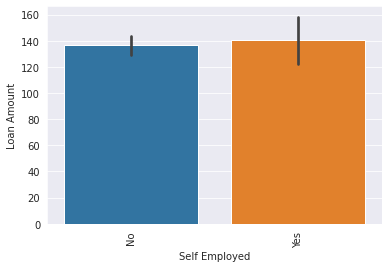

In [64]:
#Average loan amount of each self employed
sns.barplot(x=df['Self Employed'],y=df['Loan Amount'])
plt.xticks(rotation='vertical')
plt.show()

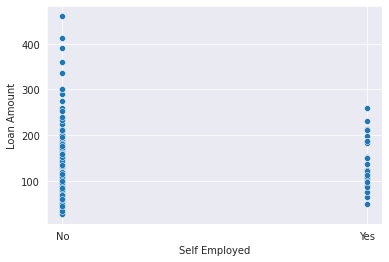

In [93]:
sns.scatterplot(x=df['Self Employed'], y=df['Loan Amount'])

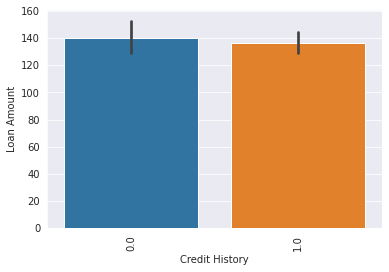

In [65]:
#Average loan amount of each credit history
sns.barplot(x=df['Credit History'],y=df['Loan Amount'])
plt.xticks(rotation='vertical')
plt.show()

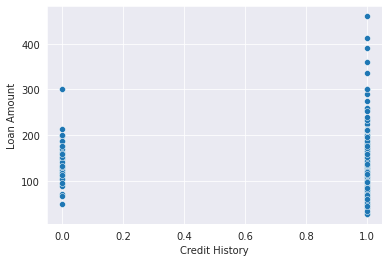

In [94]:
sns.scatterplot(x=df['Credit History'], y=df['Loan Amount'])

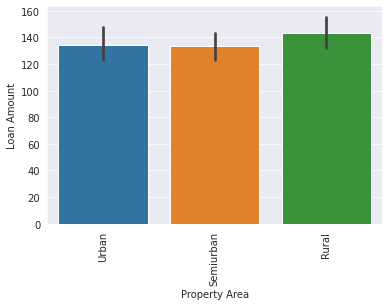

In [66]:
#Average loan amount of each property area
sns.barplot(x=df['Property Area'],y=df['Loan Amount'])
plt.xticks(rotation='vertical')
plt.show()

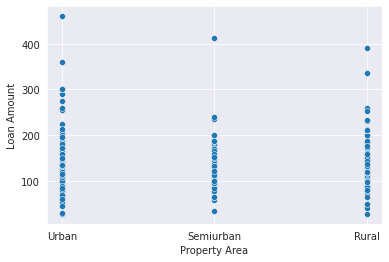

In [95]:
sns.scatterplot(x=df['Property Area'], y=df['Loan Amount'])

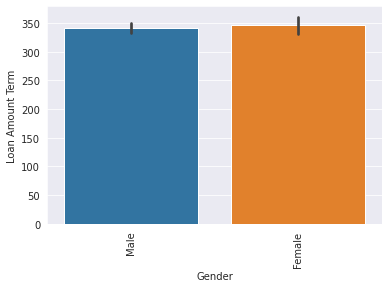

In [67]:
#Average loan amount term of each gender
sns.barplot(x=df['Gender'],y=df['Loan Amount Term'])
plt.xticks(rotation='vertical')
plt.show()

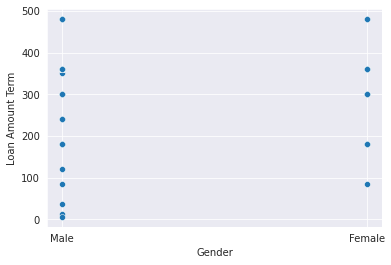

In [96]:
sns.scatterplot(x=df['Gender'], y=df['Loan Amount Term'])

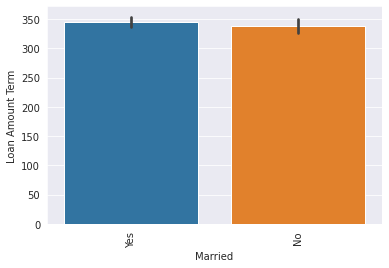

In [68]:
#Average loan amount term of each status (married)
sns.barplot(x=df['Married'],y=df['Loan Amount Term'])
plt.xticks(rotation='vertical')
plt.show()

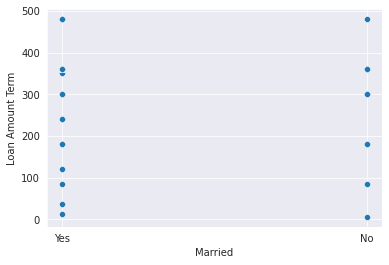

In [97]:
sns.scatterplot(x=df['Married'], y=df['Loan Amount Term'])

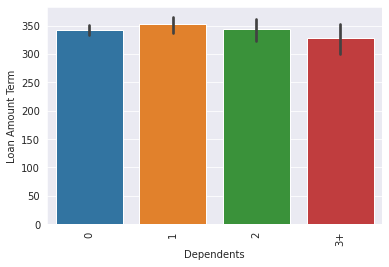

In [69]:
#Average loan amount term of each dependents
sns.barplot(x=df['Dependents'],y=df['Loan Amount Term'])
plt.xticks(rotation='vertical')
plt.show()

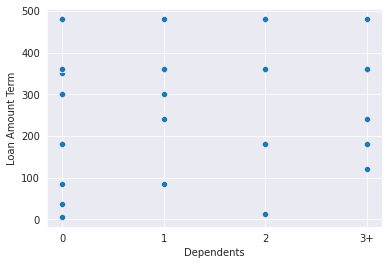

In [98]:
sns.scatterplot(x=df['Dependents'], y=df['Loan Amount Term'])

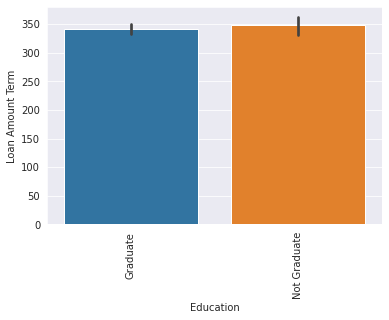

In [70]:
#Average loan amount term of each education
sns.barplot(x=df['Education'],y=df['Loan Amount Term'])
plt.xticks(rotation='vertical')
plt.show()

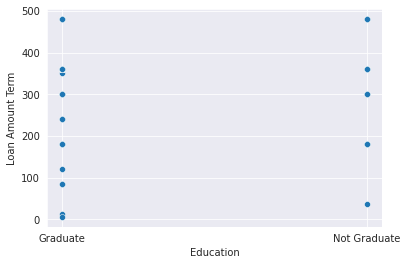

In [99]:
sns.scatterplot(x=df['Education'], y=df['Loan Amount Term'])

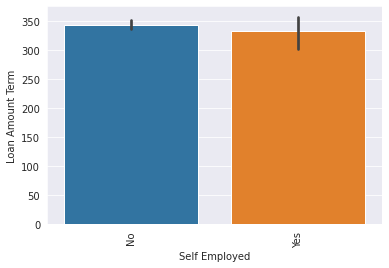

In [72]:
#Average loan amount term of each self employed
sns.barplot(x=df['Self Employed'],y=df['Loan Amount Term'])
plt.xticks(rotation='vertical')
plt.show()

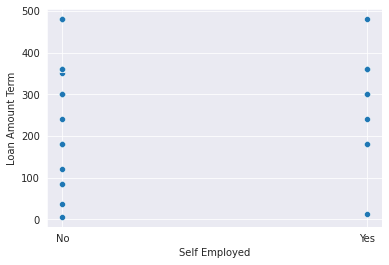

In [100]:
sns.scatterplot(x=df['Self Employed'], y=df['Loan Amount Term'])

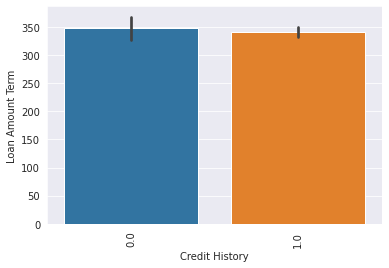

In [73]:
#Average loan amount term of each credit history
sns.barplot(x=df['Credit History'],y=df['Loan Amount Term'])
plt.xticks(rotation='vertical')
plt.show()

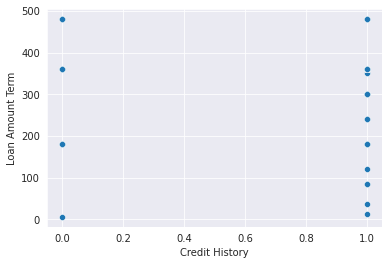

In [101]:
sns.scatterplot(x=df['Credit History'], y=df['Loan Amount Term'])

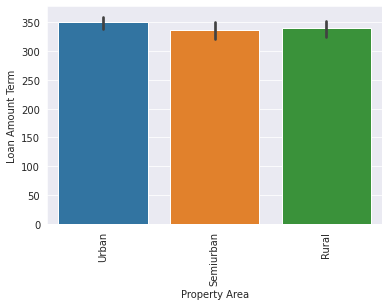

In [74]:
#Average loan amount term of each property area
sns.barplot(x=df['Property Area'],y=df['Loan Amount Term'])
plt.xticks(rotation='vertical')
plt.show()

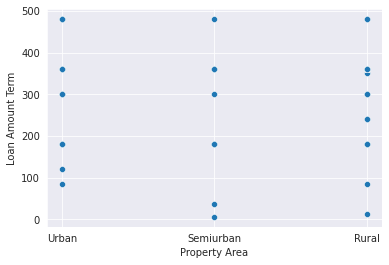

In [102]:
sns.scatterplot(x=df['Property Area'], y=df['Loan Amount Term'])

In [76]:
#Korelasi loan amount
df.corr()['Loan Amount']

Applicant Income      0.445695
Coapplicant Income    0.230355
Loan Amount           1.000000
Loan Amount Term      0.115750
Credit History       -0.023894
Name: Loan Amount, dtype: float64

In [78]:
#Korelasi applicant income
df.corr()['Applicant Income']

Applicant Income      1.000000
Coapplicant Income   -0.084353
Loan Amount           0.445695
Loan Amount Term      0.022727
Credit History        0.086844
Name: Applicant Income, dtype: float64

In [80]:
#Korelasi coapplicant income
df.corr()['Coapplicant Income']

Applicant Income     -0.084353
Coapplicant Income    1.000000
Loan Amount           0.230355
Loan Amount Term     -0.000621
Credit History       -0.094596
Name: Coapplicant Income, dtype: float64

In [81]:
#Korelasi loan amount term
df.corr()['Loan Amount Term']

Applicant Income      0.022727
Coapplicant Income   -0.000621
Loan Amount           0.115750
Loan Amount Term      1.000000
Credit History       -0.037971
Name: Loan Amount Term, dtype: float64

In [82]:
#Korelasi credit history
df.corr()['Credit History']

Applicant Income      0.086844
Coapplicant Income   -0.094596
Loan Amount          -0.023894
Loan Amount Term     -0.037971
Credit History        1.000000
Name: Credit History, dtype: float64

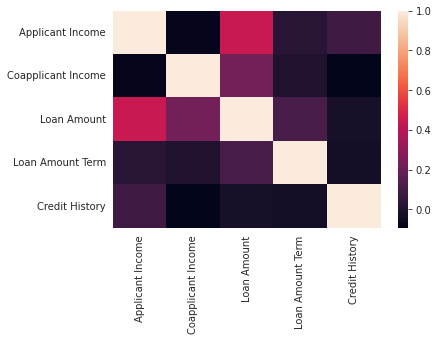

In [103]:
sns.heatmap(df.corr())

**Splitting Data to Testing Data and Training Data**

In [110]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn-dataprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import f_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
#sklearn-models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

to be continued...